<a href="https://colab.research.google.com/github/TanmaySantra/Sales_Forecast/blob/main/Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_excel("SALES.xlsx")
df.head()

,RegionCode,Region,TerritoryCode,Territory,BrandCode,Brand,Actual Date,Retail_Sales,Whole_Sale
0,1,Central,1,Faisalabad,1,Cabin,2021-01-02,0.05642,0.0
1,1,Central,1,Faisalabad,1,Cabin,2021-01-02,0.00210,0.0
2,1,Central,1,Faisalabad,1,Cabin,2021-01-02,0.00100,0.0
3,1,Central,1,Faisalabad,2,Parle-G,2021-01-02,0.60190,0.0
4,1,Central,1,Faisalabad,3,Britannia,2021-01-02,0.02614,0.0


In [ ]:
#dding Total Sales column
df['Total_sales']=df['Retail_Sales']+df['Whole_Sale']
# adding month
df['Month']=df['Actual Date'].dt.month
#adding month_year
#%b = month
#%y= year
df['Month_Year']=df['Actual Date'].dt.strftime('%b %y')
#day
df['Day']=df['Actual Date'].dt.day
#day_name
#%a = day
df['Day_name']=df['Actual Date'].dt.strftime('%a')
#year
df['Year']=df['Actual Date'].dt.year
df.head()

,RegionCode,Region,TerritoryCode,Territory,BrandCode,Brand,Actual Date,Retail_Sales,Whole_Sale,Total_sales,Month,Month_Year,Day,Day_name,Year
0,1,Central,1,Faisalabad,1,Cabin,2021-01-02,0.05642,0.0,0.05642,1,Jan 21,2,Sat,2021
1,1,Central,1,Faisalabad,1,Cabin,2021-01-02,0.00210,0.0,0.00210,1,Jan 21,2,Sat,2021
2,1,Central,1,Faisalabad,1,Cabin,2021-01-02,0.00100,0.0,0.00100,1,Jan 21,2,Sat,2021
3,1,Central,1,Faisalabad,2,Parle-G,2021-01-02,0.60190,0.0,0.60190,1,Jan 21,2,Sat,2021
4,1,Central,1,Faisalabad,3,Britannia,2021-01-02,0.02614,0.0,0.02614,1,Jan 21,2,Sat,2021


#Year Sales Stats

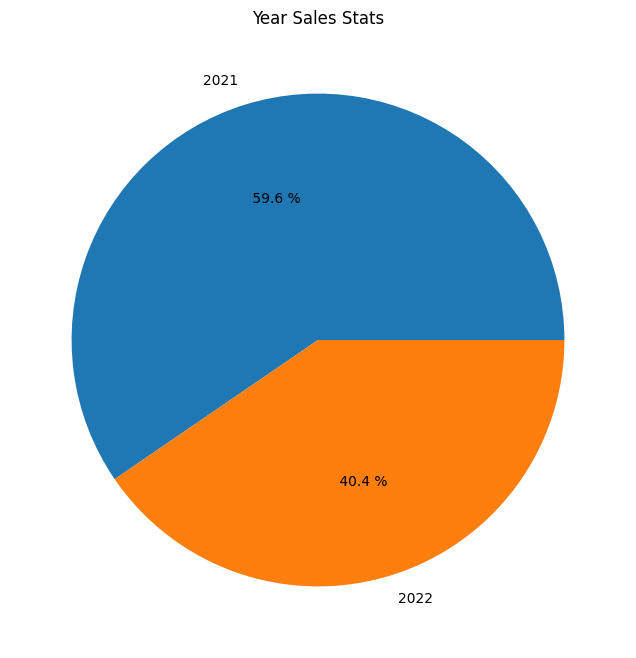

In [ ]:
year_sales = df.pivot_table(index="Year", values='Total_sales', aggfunc='sum')
year_sales.reset_index()
y=year_sales['Total_sales']
x=df.Year.unique()
#PieChart
plt.figure(figsize=(8, 8))
plt.pie(y,labels=x,autopct='% .1f %%')
plt.title('Year Sales Stats')
plt.show()

#Monthly Sales Trend

<function matplotlib.pyplot.show(close=None, block=None)>

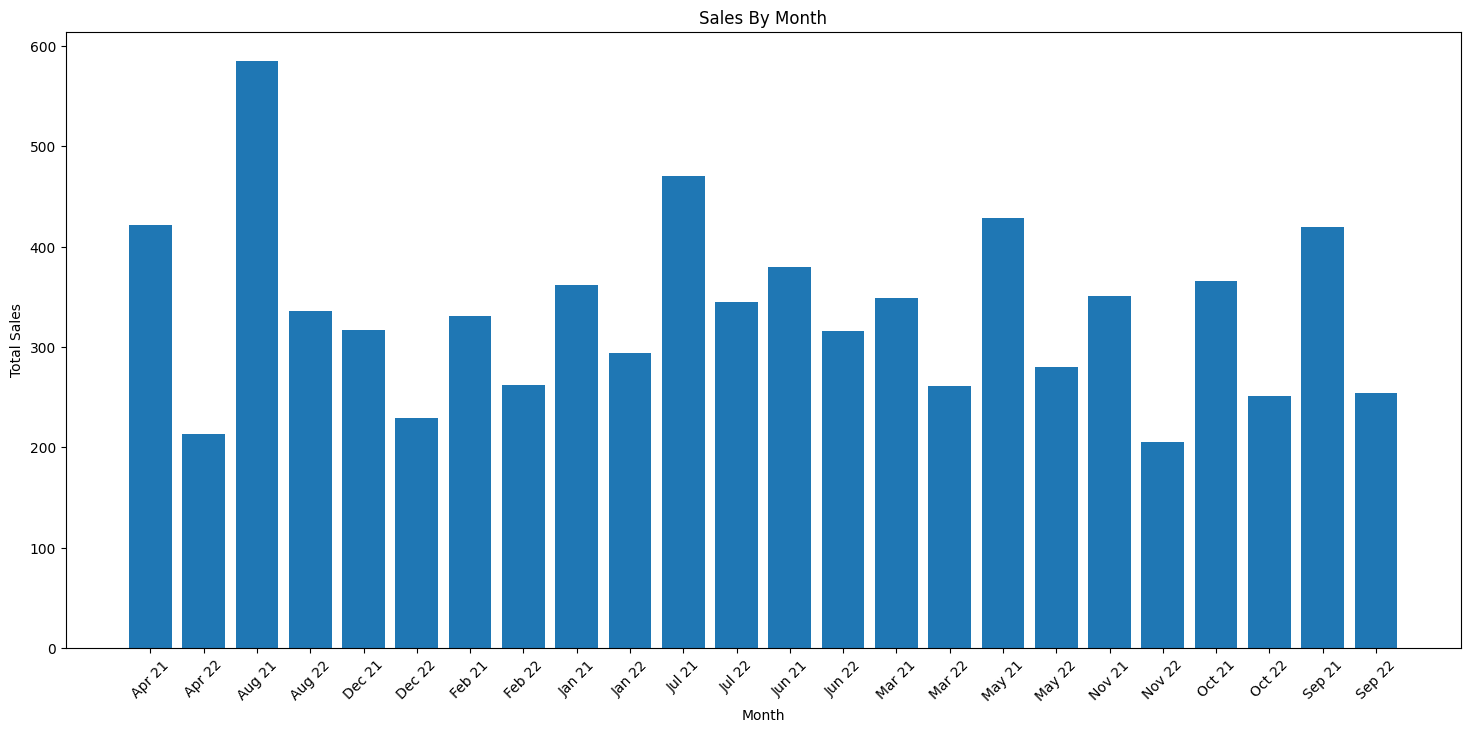

In [ ]:
monthly_sales = df.pivot_table(index="Month_Year", values='Total_sales', aggfunc='sum')
monthly_sales= monthly_sales.reset_index()

x= monthly_sales['Month_Year']
y= monthly_sales['Total_sales']

#Bar Chart
plt.figure(figsize=(18, 8))
plt.title('Sales By Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show

#Brand Wise Sales

<function matplotlib.pyplot.show(close=None, block=None)>

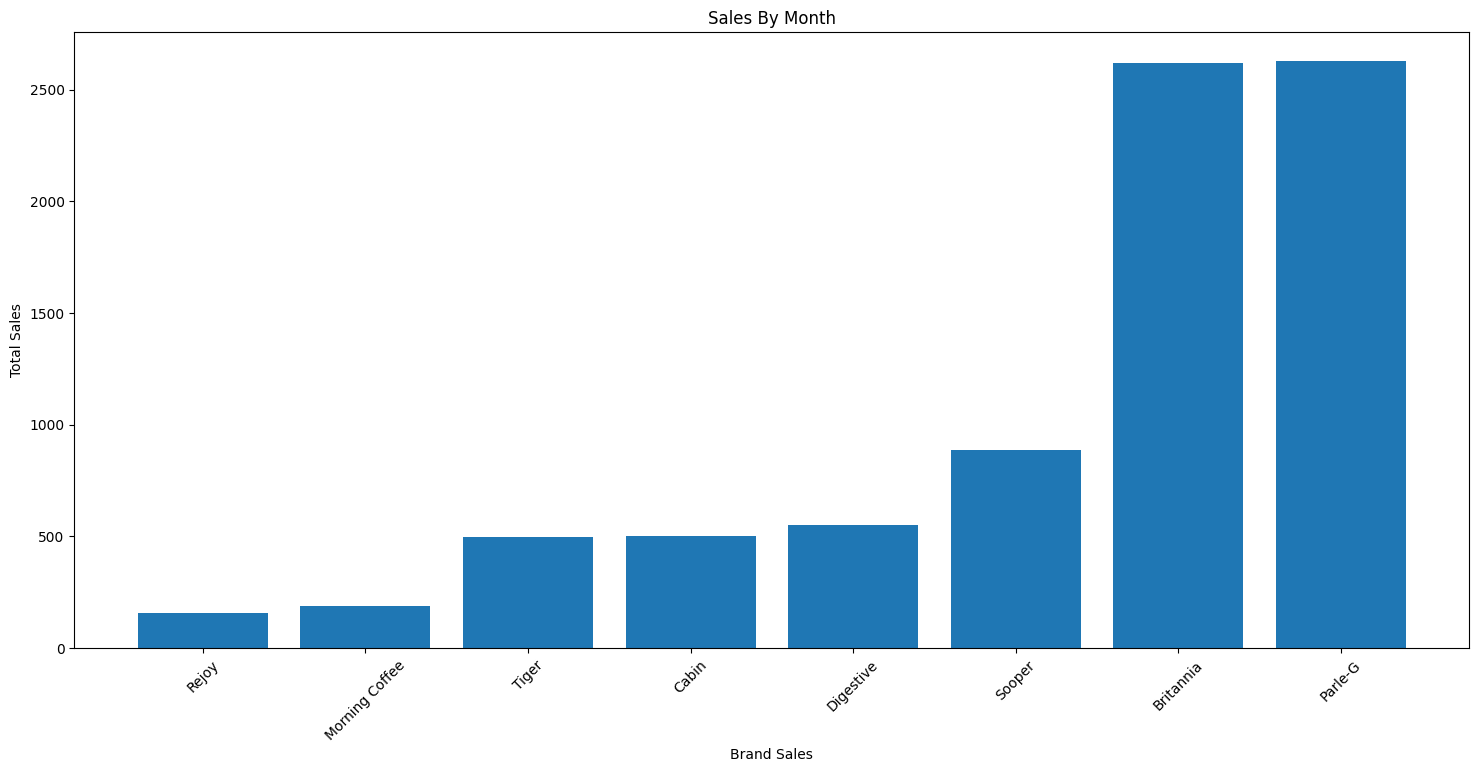

In [ ]:
brand_sales = df.pivot_table(index="Brand", values='Total_sales', aggfunc='sum')
brand_sales= brand_sales.reset_index()
brand_sales = brand_sales.sort_values(by='Total_sales', ascending=True)
x= brand_sales['Brand']
y= brand_sales['Total_sales']

#Bar Chart
plt.figure(figsize=(18, 8))
plt.title('Sales By Month')
plt.xlabel('Brand Sales')
plt.ylabel('Total Sales')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show


#territory wise sales

<function matplotlib.pyplot.show(close=None, block=None)>

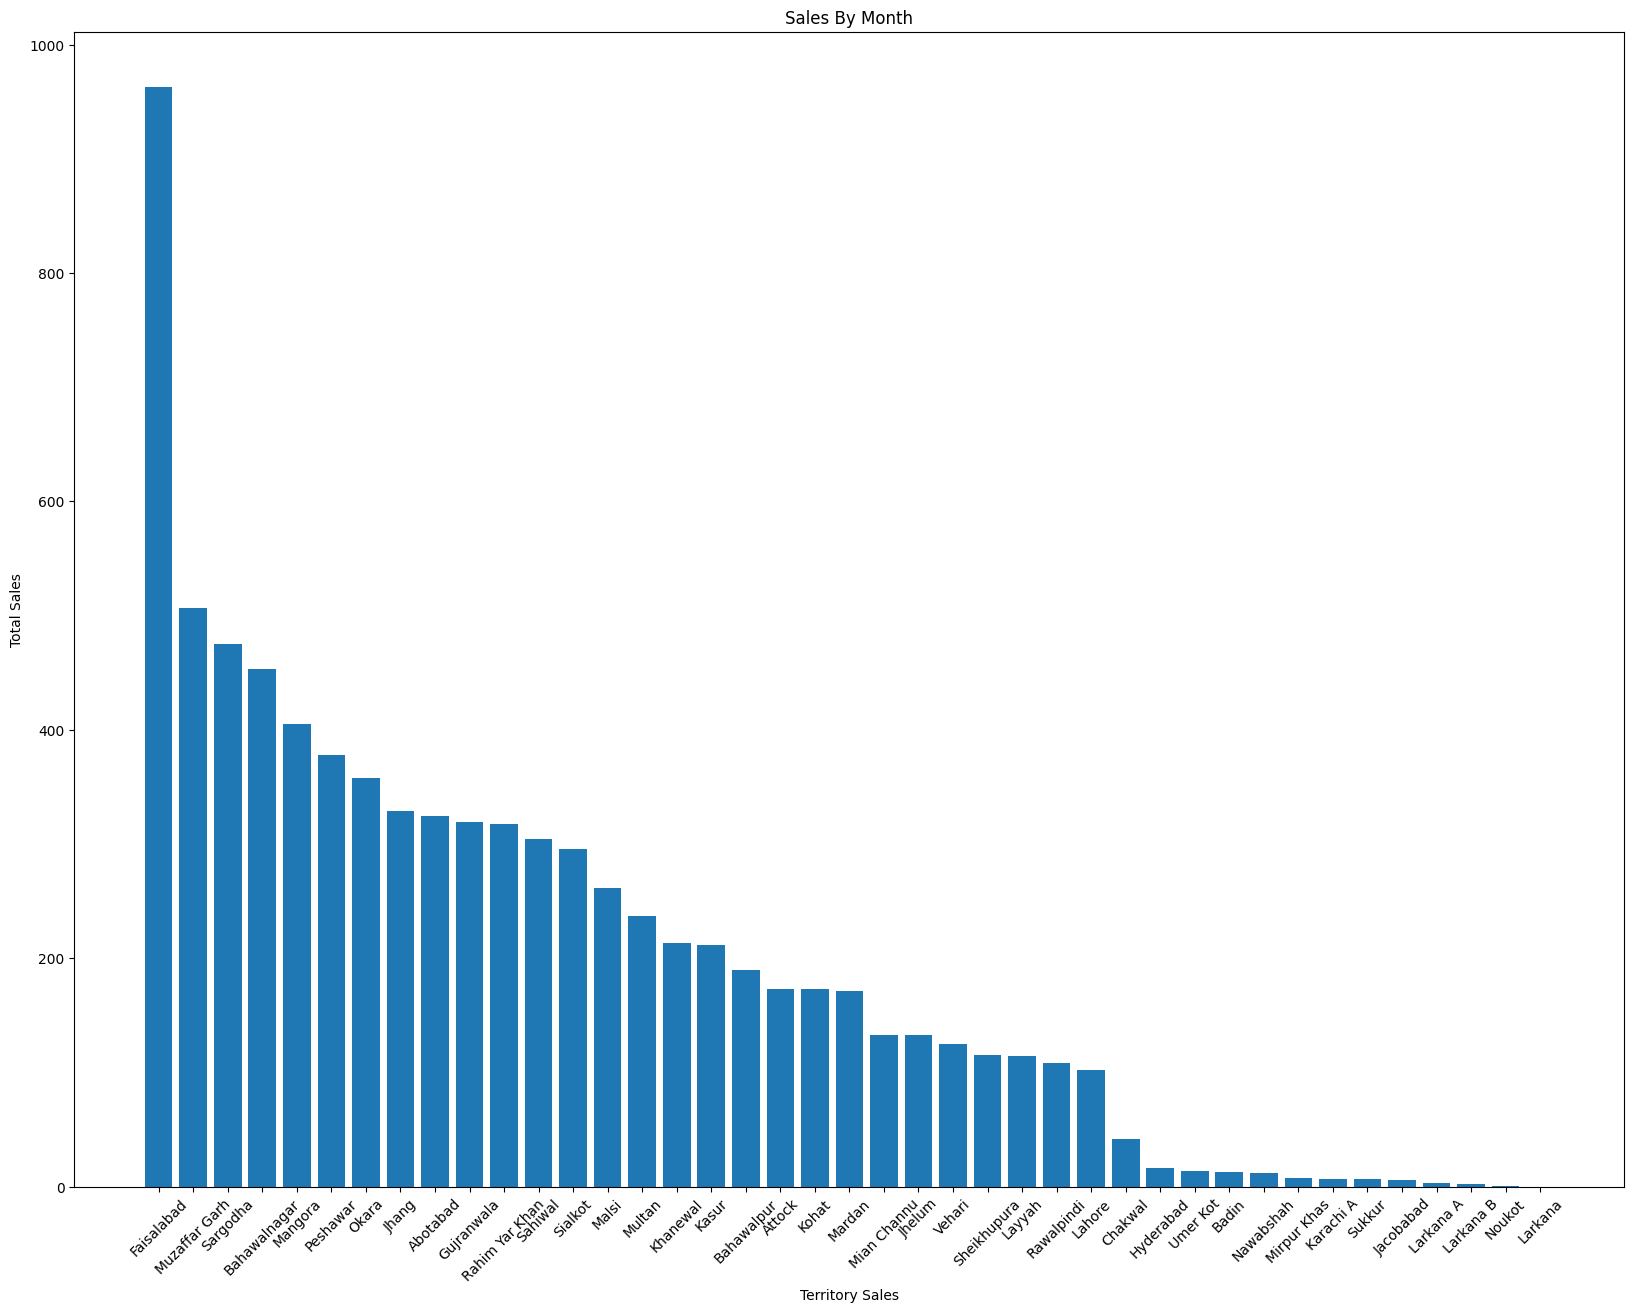

In [ ]:
territory_sales = df.pivot_table(index="Territory", values='Total_sales', aggfunc='sum')
territory_sales= territory_sales.reset_index()
territory_sales= territory_sales.sort_values(by='Total_sales', ascending=False)
x= territory_sales['Territory']
y= territory_sales['Total_sales']

#Bar Chart
plt.figure(figsize=(20, 15))
plt.title('Sales By Month')
plt.xlabel('Territory Sales')
plt.ylabel('Total Sales')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show

In [ ]:
monthly_sales = df.pivot_table(index=['Year','Month'], values='Total_sales', aggfunc='sum')
monthly_sales= monthly_sales.reset_index()

#TEST, TRAIN, VALID

In [ ]:
#using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
monthly_sales=df.pivot_table(index=['Year','Month'], values='Total_sales', aggfunc='sum')
monthly_sales= monthly_sales.reset_index()
train, test = train_test_split(monthly_sales, test_size=0.2, shuffle=False)
print(train)
print(test)

    Year  Month  Total_sales
0   2021      1   361.873830
1   2021      2   331.125998
2   2021      3   349.096350
3   2021      4   421.218276
4   2021      5   428.249144
5   2021      6   379.689630
6   2021      7   470.788048
7   2021      8   584.822190
8   2021      9   419.210382
9   2021     10   365.576000
10  2021     11   351.091362
11  2021     12   316.474637
12  2022      1   293.696852
13  2022      2   261.714788
14  2022      3   261.066454
15  2022      4   213.148093
16  2022      5   280.073354
17  2022      6   316.273980
18  2022      7   345.121950
    Year  Month  Total_sales
19  2022      8   335.989174
20  2022      9   253.941110
21  2022     10   250.927710
22  2022     11   205.170770
23  2022     12   228.897180


#Train MOdel

In [ ]:
X_train=train[['Year','Month']] #Independent Data
y_train=train['Total_sales']  #Target Data

In [ ]:
lr_model=LinearRegression() #Training the Model
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
score=lr_model.score(X_train,y_train)
print(score)

0.46665885003641816


In [ ]:
#Prediction
X_test=train[['Year','Month']] #Independent Data
y_test=train['Total_sales']  #Target Data

y_pred=lr_model.predict(X_test)
print(y_pred)

[383.61364018 386.27806692 388.94249366 391.6069204  394.27134714
 396.93577388 399.60020062 402.26462736 404.9290541  407.59348084
 410.25790758 412.92233432 273.59178707 276.25621381 278.92064055
 281.58506729 284.24949403 286.91392077 289.57834751]


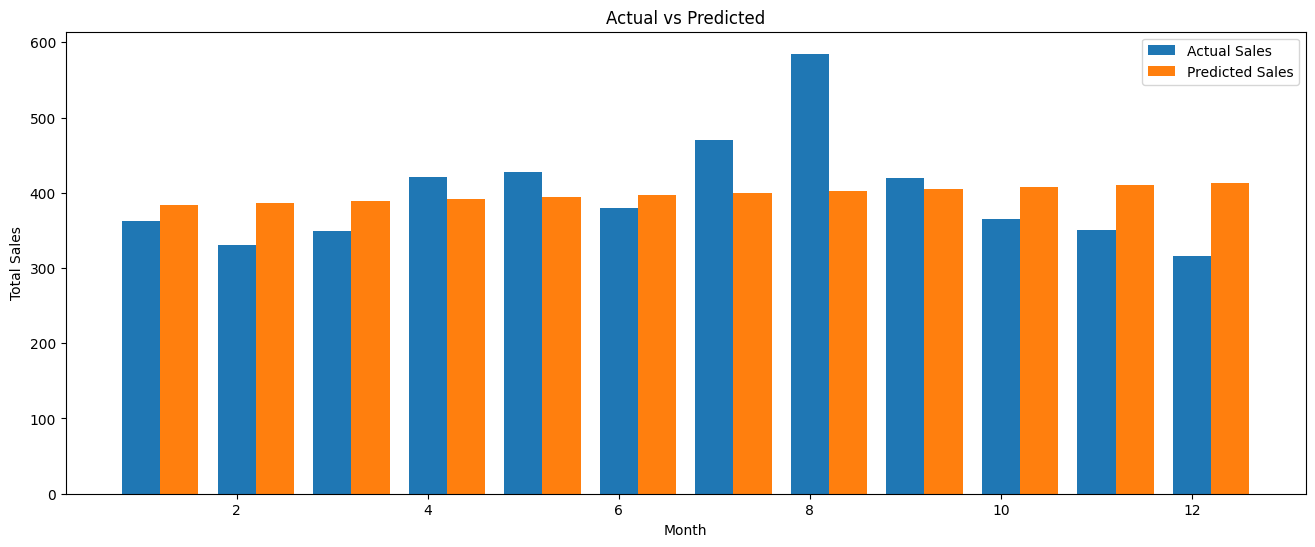

In [ ]:
x=X_test['Month']
bar_width=0.4
plt.figure(figsize=(16,6))
plt.bar(x ,y_test,label='Actual Sales',width=bar_width)#Given Values
plt.bar(x + bar_width,y_pred,label='Predicted Sales',width=bar_width)#Predicted Values
plt.title('Actual vs Predicted')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()